# Investigating Tree Canopy Inequity In Vancouver, British Columbia
Group 50: Paul English, Zhuoran Wang, Junyao Wang, Halley Suarez, Eric Shuai

<h2 style="color:#008a05">Introduction</h2>

Worldwide, cities are facing major environmental challenges posed by climate change. Green infrastructure in an urban setting is key to overcoming these challenges, all while creating more livable cities (Baró et. al., 2019). Urban tree cover in the form of street trees is a critical component of green infrastructure, providing a variety of ecosystem services beyond aesthetic benefits. These include temperature regulation, air purification, and increased stormwater runoff control (McDonald et. al. 2021). But, not all trees provide the same amount of benefits.  Larger trees are better equipped to provide these ecosystem services as they have greater structural complexity and a more developed canopy (Baró et. al., 2019). For example, a more productive, larger tree can remove ~290 times more air pollutants and avoid ~24 times more runoff than a less productive, smaller tree (Baró et. al., 2019). 

Thus, urban tree cover is an integral piece of life in a city environment, yet there are many areas in and around Vancouver that exhibit little to no tree cover at all. This phenomenon is known as **tree canopy inequity**, where low-income and minority neighbourhoods tend to have less tree cover and fewer large trees than wealthier and non-minority neighbourhoods, and has been observed in cities across Canada (Kiani et. al., 2023). In this study, wealth is analyzed in the Greater Vancouver Area to see if a high-income neighbourhood (Shaughnessy) has larger trees than a low-income neighbourhood (Renfrew-Collingwood). This study plans to investigate if there is a positive association between income and mean tree diameter in these two neighbourhoods to test if tree canopy inequity is present. Additionally, the standard deviation of tree diameter will be explored to quantify the observed variation in tree size.

**Question:** How does mean tree diameter differ between Shaughnessy, the highest income neighbourhood in Vancouver, and Renfrew-Collingwood, one of the lowest income neighbourhoods in Vancouver?


<h2 style="color:#008a05">Method</h2>

<h3 style="color:#039be5">Experimental Design</h3>

This study will focus on the City of Vancouver Open Data `street_trees` and `AreaProfiles` dataset. The `street_trees` dataset contains information about public trees planted along boulevards in Vancouver from 2016, with key information like `DIAMETER` (in inches) and `NEIGHBOURHOOD_NAME`. We will use these to find the mean diameter in each area. `AreaProfiles` contains the average income for each neighbourhood from the 2015 census which will be used to match area incomes with its respective mean diameter to test for the tree inequity theory.

<h3 style="color:#039be5">Analysis Procedure</h3>

A preliminary analysis using descriptive statistics is conducted to contextualize the predicted results. 

The first hypothesis test uses a two-sample independent t-test procedure. First, $n_p = 50,000$ pairs of different neighbourhoods for calculating ratios are obtained. Then, from each neighbourhood in the sampled pairs, $n_d = 30$ trees will be sampled and their mean diameters will be calculated. From each pair of mean diameters, a t–score is calculated providing a t-distribution for two-tailed hypothesis testing. For the first inference it is predicted that the t-scores are distributed normally, explained by CLT.

The second hypothesis test similarly follows a two-sample independent t-test procedure,  however all tree diameters are standardized by the income. 

<h3 style="color:#039be5">Hypotheses</h3>

**Part 1:** Do tree diameters differ between neighbourhoods, and if so, by how much (standard deviation)? How certain are we (confidence interval)?

- __Null Hypothesis:__ Mean diameter derived from $n_d$ random trees in one neighbourhood $i$ is equal to the mean diameter from $n_d$ random trees in another neighbourhood $j = 1$.<br>$H_0: \mu_{d_i} = \mu_{d_j}$
- __Alternate hypothesis:__ Mean diameter derived from $n_d$ random trees in one neighbourhood $i$ is equal to the mean diameter from $n_d$ random trees in another neighbourhood $j$.<br>$H_A: \mu_{d_i} \neq  \mu_{d_j}$

Where:
- $n_d$ = Number of tree diameters to be sampled from a neighbourhood
- $i,j$ = Two different neighbourhoods
- ${mu}_{d_i},{mu}_{d_j}$ = Mean diameter obtained from $n_d$ trees grouped by neighbourhood ($i$, $j$, etc.)

**Part 2:** Infer the relationship between tree diameter and income

- __Null hypothesis:__ Mean diameter derived from $n_d$ random trees in one neighbourhood $i$ is equal to the mean standardized diameter from $n_d$ random trees in another neighbourhood $j$. <br>$H_0: \frac{\mu_{d_i}}{I_i} = \frac{\mu_{d_j}}{I_i}$ 
- __Alternate hypothesis:__ Ratios of mean tree diameter derived from a random sample of $n_d$ random trees within a neighbourhood $i$ to the income of that neighbourhood $i$. <br>$ H_A: \dfrac{\mu_{d_i}}{I_i} \neq \dfrac{\mu_{d_j}}{I_j} $ 

Where:
- $n_d$ = Number of diameters to be sampled from a neighbourhood
- ${mu}_{d_i}$ = Mean diameter from sample
- $I_i,I_j$ = Neighbourhood

<h3 style="color:#039be5">Expected Outcomes and Significance</h3>

It is expected that neighbourhoods with a higher mean income (eg. Shaughnessy) have a larger mean tree diameter than neighbourhoods with a lower mean income. It is also expected that the standard deviation of high income neighborhoods and low income neighborhoods to be similar. 

The findings of this paper help characterize the inequality of access to ecosystem services by impoverished communities in Vancouver. Conclusions drawn in this paper could aid future research to characterize how unequal access to ecosystem services contribute to an intersectional (race, gender, religion, etc.) cycle of oppression. As all of this data was collected and published by the Vancouver government, this makes this source very reliable to help answer the questions of this report.

More precise questions tackling this topic could include:
- Do communities with smaller trees receive less infrastructure funding?
- Are properties with higher values closer to large trees and/or green space?

<h2 style="color:#008a05">Preliminary Exploratory Data Analysis</h2>

In [1]:
# --- Setting up prerequisites libraries ---
library(tidyverse)
library(tidymodels)
library(repr)
library(infer)
library(broom)
library(digest)
library(gridExtra)
options(repr.matrix.max.rows = 8)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

<h3 style="color:#039be5">How we picked our regions</h3>

Our objective of this report is to see whether tree canopy inequity is most emphasized between neighbourhoods with high and low income. To accomplish this, we used the `AreaProfiles` dataset from the 2015 census, containing the average income for each neighbourhood in the Greater Vancouver region, to pick out these two extremes.

We begin by loading in this data and selecting the correct data point.

In [2]:
# load income data in Vancouver
area_profiles <- read_csv(url("https://github.com/eshuaiii/stat-201-2023w1-group-50/raw/main/AreaProfiles.csv"), skip = 4)

# The census data contains much more information than we need, with each info point as a row.
# Hence, we'll slice only the average income field (at row 1882) from the dataset
average_income <- slice(area_profiles, 1882)

average_income

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 5589 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Variable
dbl  (1): ID
num (24): Arbutus-Ridge, Downtown, Dunbar-Southlands, Fairview, Grandview-Wo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,⋯,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1858,Average total income in 2015 among recipients ($),62675,63251,78117,61627,42896,38258,38411,77248,⋯,53060,118668,65459,31534,34212,34298,47253,82042,50317,46821


Next, we'll clean up our `average_income` dataset, modifying it into a long format. We will also remove the `Variable` and `ID` columns as they give technical information, and will also remove the `Vancouver CSD` and `Vancouver CMA` columns as they are summaries of regions (`Vancouver CSD` is the average income in the entire city of Vancouver, and `Vancouver CMA` the metropolitian area of Vancouver).

In [3]:
# Lengthening the dataset and removing unnecessary columns
income <- average_income |>
    select(-Variable, -ID, -"Vancouver CSD", -"Vancouver CMA") |>
    pivot_longer(cols = everything(), names_to = "neighbourhood_name", values_to = "mean_income")
    # arrange(mean_income) # sort income in ascending order

head(income)
# See the resulting data further down this report.

neighbourhood_name,mean_income
<chr>,<dbl>
Arbutus-Ridge,62675
Downtown,63251
Dunbar-Southlands,78117
Fairview,61627
Grandview-Woodland,42896
Hastings-Sunrise,38258


Finally, we can plot this income data to pick out our neighbourhoods of interest.

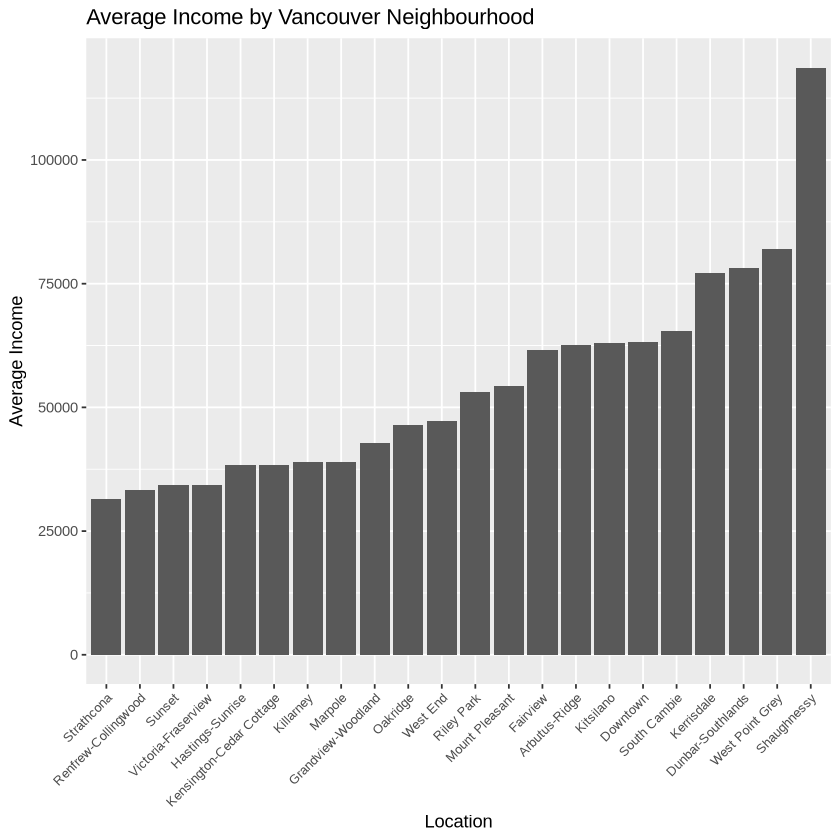

In [4]:
income_plot <- income |>
    ggplot(aes(x = reorder(neighbourhood_name, +mean_income), y = mean_income)) +
    geom_bar(stat = "identity") +
    labs(title="Average Income by Vancouver Neighbourhood",
         x="Location",
         y="Average Income") +
    theme(axis.text.x = element_text(size=8, angle=45, hjust=1))
income_plot

From here, we can note that Shaughnessy and Strathcona are the two extreme neighbourhoods, with Shaughnessy having the highest income and Strathcona having the lowest.<br>
However, it's also important to note that Strathcona is a very small neighbourhood, with most of its land use towards housing Pacific Central station and factories. Instead, we hope to compare more residential neighbourhoods. Hence, we look to the neighbourhood with the next smallest income - Renfrew-Collingwood, and note that it is a more residential neighbourhood.

<h3 style="color:#039be5">Tidying our Trees Dataset </h3>

In [5]:
# --- Load tree data from the web  ---
# load data about all trees in Vancouver
street_trees <- read_delim(url("https://github.com/eshuaiii/stat-201-2023w1-group-50/raw/main/streettrees.csv"), delim=";")

# Preview the data
head(street_trees, 3)

# Run this cell before continuing.
# library(tidyverse)
# library(broom)
# library(repr)
# library(digest)
# library(infer)
# library(gridExtra)
# library(dplyr)
# library(ggplot2)
# street_trees <- read.csv("streettrees.csv", sep=";")
# street_trees <- na.omit(street_trees)
# data <- readLines("AreaProfiles.txt")
# csv_content <- data[5:length(data)]
# csv_string <- paste(csv_content, collapse = "\n")
# area_profiles <- read.csv(text = csv_string, header = TRUE, stringsAsFactors = FALSE)
# area_profiles <- na.omit(area_profiles)
# average_income <- slice(area_profiles, 1882)
# average_income

Rows: 150695 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (15): STD_STREET, GENUS_NAME, SPECIES_NAME, CULTIVAR_NAME, COMMON_NAME,...
dbl   (5): TREE_ID, CIVIC_NUMBER, ON_STREET_BLOCK, HEIGHT_RANGE_ID, DIAMETER
date  (1): DATE_PLANTED

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TREE_ID,CIVIC_NUMBER,STD_STREET,GENUS_NAME,SPECIES_NAME,CULTIVAR_NAME,COMMON_NAME,ASSIGNED,ROOT_BARRIER,PLANT_AREA,⋯,ON_STREET,NEIGHBOURHOOD_NAME,STREET_SIDE_NAME,HEIGHT_RANGE_ID,HEIGHT_RANGE,DIAMETER,CURB,DATE_PLANTED,Geom,geo_point_2d
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<date>,<chr>,<chr>
5791,3708,W 35TH AV,PSEUDOTSUGA,MENZIESII,NA,DOUGLAS FIR,N,N,L,⋯,W 35TH AV,DUNBAR-SOUTHLANDS,EVEN,9,90' - 100',50.00,Y,NA,"{""coordinates"": [-123.186767, 49.240027], ""type"": ""Point""}","49.240027, -123.186767"
5797,1101,E 7TH AV,ACER,PLATANOIDES,NA,NORWAY MAPLE,Y,N,N,⋯,E 7TH AV,MOUNT PLEASANT,ODD,2,20' - 30',8.25,Y,NA,"{""coordinates"": [-123.080395, 49.264375], ""type"": ""Point""}","49.264375, -123.080395"
5798,1101,E 7TH AV,ACER,PLATANOIDES,NA,NORWAY MAPLE,Y,N,N,⋯,E 7TH AV,MOUNT PLEASANT,ODD,3,30' - 40',12.25,Y,NA,"{""coordinates"": [-123.080284, 49.264372], ""type"": ""Point""}","49.264372, -123.080284"


Let's start by cleaning up our data to select only our required columns: the tree's neighbourhood and its diameter, as well as some extra information (its ID and common name). We'll also filter for trees in the Renfrew-Collingwood and Shaugnessy regions, before finally cleaning up the column names to make things more readable.

In [6]:
# Remove unnecessary columns and remove any data points from street_trees that have an NA value for diameter
street_trees_cleaned <- street_trees |>
    select(TREE_ID, COMMON_NAME, NEIGHBOURHOOD_NAME, DIAMETER) |>
    filter(NEIGHBOURHOOD_NAME %in% c("RENFREW-COLLINGWOOD", "SHAUGHNESSY")) |>
    filter(!is.na(DIAMETER))

# Also tidy up column names
names(street_trees_cleaned) <- tolower(names(street_trees_cleaned))
street_trees_cleaned$neighbourhood_name[street_trees_cleaned$neighbourhood_name == "RENFREW-COLLINGWOOD"]<- "Renfrew-Collingwood"
street_trees_cleaned$neighbourhood_name[street_trees_cleaned$neighbourhood_name == "SHAUGHNESSY"]<- "Shaughnessy"

head(street_trees_cleaned)

tree_id,common_name,neighbourhood_name,diameter
<dbl>,<chr>,<chr>,<dbl>
12347,AKEBONO FLOWERING CHERRY,Renfrew-Collingwood,3.00
120762,PISSARD PLUM,Renfrew-Collingwood,20.00
120763,KWANZAN FLOWERING CHERRY,Renfrew-Collingwood,14.00
120765,PISSARD PLUM,Renfrew-Collingwood,18.00
120775,PISSARD PLUM,Renfrew-Collingwood,14.00
120787,PISSARD PLUM,Renfrew-Collingwood,18.75


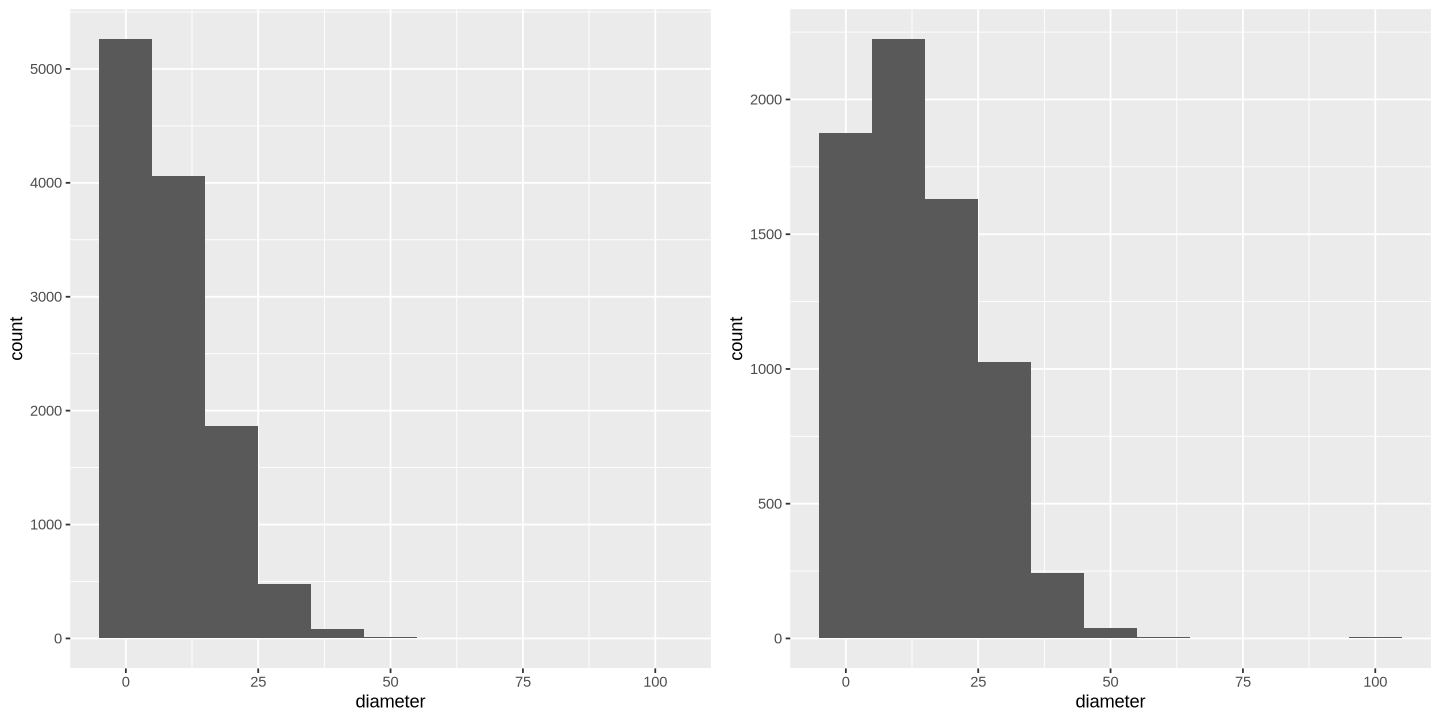

In [7]:
# !!! ADD TITLES
# Plot the tree diameters in Renfrew-Collingwood
RC_diameter_plot <- street_trees_cleaned |>
    filter(neighbourhood_name == "Renfrew-Collingwood") |>
    ggplot(aes(x = diameter)) +
        geom_histogram(binwidth = 10)

# Plot the tree diameters in Shaughnessy
S_diameter_plot <- street_trees_cleaned |>
    filter(neighbourhood_name == "Shaughnessy") |>
    ggplot(aes(x = diameter)) +
        geom_histogram(binwidth=10)

options(repr.plot.width = 12, repr.plot.height = 6)
grid.arrange(RC_diameter_plot, S_diameter_plot, ncol = 2)

<h2 style="color:#008a05">Data Analysis</h2>

Although these two area samples' tree diameter distributions are not normal, the sample sizes are large enough to apply Central Limit Theorem to compute two sample t test. 

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


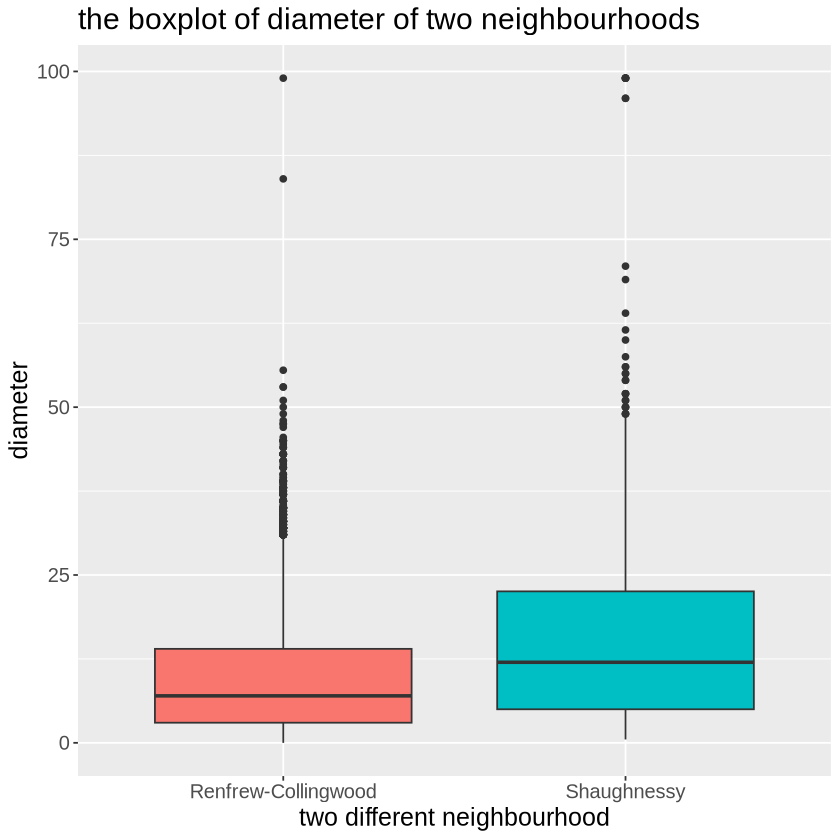

In [8]:
treediameter_boxplots <-
    street_trees_cleaned %>% 
    ggplot() +
    geom_boxplot(aes(neighbourhood_name, diameter, fill = neighbourhood_name)) +
    theme(text = element_text(size = 15)) +
    ggtitle("the boxplot of diameter of two neighbourhoods") + 
    xlab("two different neighbourhood") + 
    ylab("diameter") + 
    guides(fill = FALSE)

options(repr.plot.width = 7, repr.plot.height = 7)
treediameter_boxplots

In [16]:
# <move somewhere else!>
shaughnessy <- street_trees_cleaned |>
    filter(neighbourhood_name == "Shaughnessy") 

rc <- street_trees_cleaned |>
    filter(neighbourhood_name == "Renfrew-Collingwood") 

test <- tidy(t.test(x = shaughnessy$diameter, y = rc$diameter, alternative = "greater"))
test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5.307238,14.81188,9.504639,35.27123,5.772436e-259,11328.32,5.059717,Inf,Welch Two Sample t-test,greater


In [9]:
#summarize the two samples' means and variances in a table
RC_Shaughnessy_summary <- 
     street_trees_cleaned %>% 
     group_by(neighbourhood_name) %>% 
     summarise(sample_mean = mean(diameter), 
               sample_var = var(diameter), 
               n = n())
RC_Shaughnessy_summary

neighbourhood_name,sample_mean,sample_var,n
<chr>,<dbl>,<dbl>,<int>
Renfrew-Collingwood,9.504639,61.77422,11760
Shaughnessy,14.811877,122.55139,7048


In [11]:
# null model

null_model <- street_trees_cleaned %>%
  specify(diameter ~ neighbourhood_name) %>%
  hypothesize(null = "independence") %>%
  generate(reps = 200, type = "permute") %>%
  calculate(stat = "diff in means", order = c("Shaughnessy", "Renfrew-Collingwood"))

head(null_model)

replicate,stat
<int>,<dbl>
1,-0.07423268
2,0.44145490
3,-0.24221798
4,-0.18950487
5,0.03285231
6,0.16794808


In [14]:
#Compute Test statistics
standard_error <-  sqrt(RC_Shaughnessy_summary$sample_var[2]/RC_Shaughnessy_summary$n[2]+RC_Shaughnessy_summary$sample_var[1]/RC_Shaughnessy_summary$n[1])
dif_mean <- RC_Shaughnessy_summary$sample_mean[2] - RC_Shaughnessy_summary$sample_mean[1]
t_stat <- dif_mean/standard_error
t_stat

[1] 35.27123

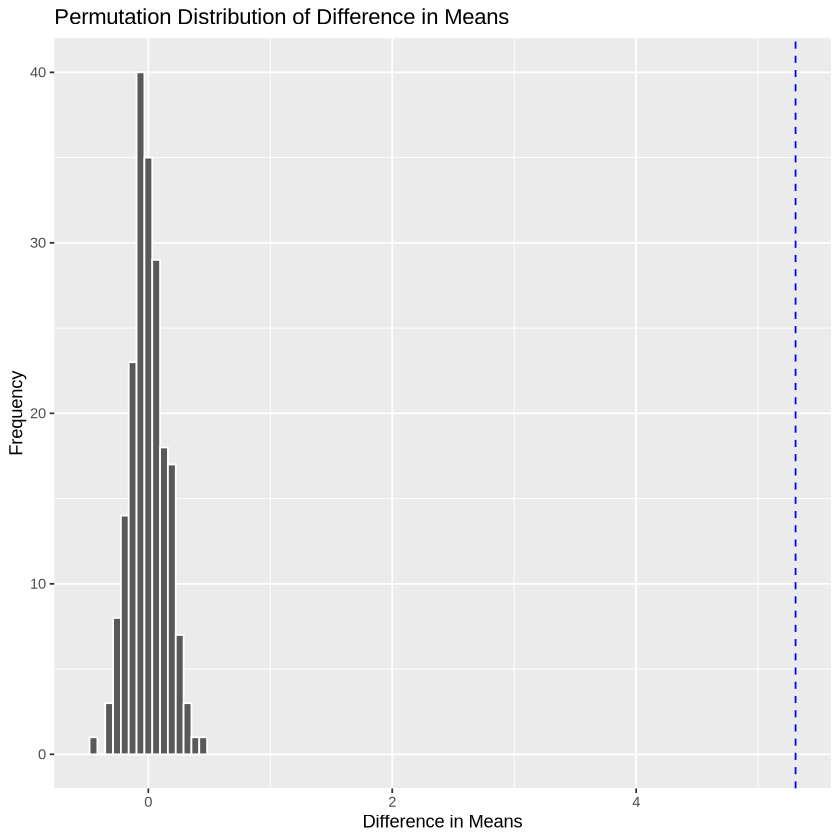

In [15]:
# plot out the null model
null_distribution <- null_model %>%
  visualize() +
  geom_vline(aes(xintercept = dif_mean), color = "blue", linetype = "dashed") +
  ggtitle("Permutation Distribution of Difference in Means") +
  xlab("Difference in Means") +
  ylab("Frequency")

null_distribution

In [ ]:
# to get df
# Sample variances for both groups
s1_var <- Strathcona_Shaughnessy_summary$sample_var[1]
s2_var <- Strathcona_Shaughnessy_summary$sample_var[2]


# Sample sizes for both groups
n1 <- Strathcona_Shaughnessy %>% filter(neighbourhood_name == "Shaughnessy") %>% nrow()
n2 <- Strathcona_Shaughnessy %>% filter(neighbourhood_name == "Strathcona") %>% nrow()

# Getting degrees of freedom
# Since there are outliers in each sample, 
# it is better to use Welch's t-test to get df, which is less sensitive towards outliers.
df <- ((s1_var / n1) + (s2_var/ n2))^2 /
      (((s1_var / n1)^2 / (n1 - 1)) + ((s2_var / n2)^2 / (n2 - 1)))

df


In [ ]:
#plot out the t distribution model
t_model<-
    tibble(t=seq(-40, 40, 0.02), density = dt(t, df)) %>% 
    ggplot() + geom_line(aes(t, density)) +
    geom_segment(aes(x = t_stat, 
                     y = 0, 
                     xend= t_stat,
                     yend = dt(t, df)),
                 colour="blue", linetype = 'dashed') + 
    xlab("Tvalue for tree diamter") +
    ggtitle("distribution of T value")+    
    theme(text = element_text(size=22)) 
t_model

In [ ]:
#calculating p value
p_value <- pt(t_stat, df, lower.tail=FALSE)
p_value

It's important to note that these graphs alone are not comprehensive enough to draw any solid conclusions. One reason why is the fact that it only generates one single statistic of mean as opposed to a range. This is analogous to the textbook examples of fishing with a spear versus fishing with a net. The wider the range, the more opportunity there is to obtain the true value. In the full report, to open such opportunities, confidence intervals will be generated using the CLT.

<h2 style="color:#008a05">References</h2>

Baró, F., Calderón-Argelich, A., Langemeyer, J., & Connolly, J. J. (2019). Under one canopy? Assessing the distributional environmental justice implications of street tree benefits in Barcelona. Environmental Science & Policy, 102, 54-64. https://www.sciencedirect.com/science/article/pii/S0169204620314766

Kiani, B., Thierry, B., Fuller, D., Firth, C., Winters, M., & Kestens, Y. (2023). Gentrification, neighborhood socioeconomic factors and urban vegetation inequities: A study of greenspace and tree canopy increases in Montreal, Canada. Landscape and Urban Planning, 240, 104871. https://doi.org/10.1016/j.landurbplan.2023.104871

McDonald, R. I., Biswas, T., Sachar, C., Housman, I., Boucher, T. M., Balk, D., Nowak, D., Spotswood, E., Stanley, C. K., & Leyk, S. (2021). The tree cover and temperature disparity in US urbanized areas: Quantifying the association with income across 5,723 communities. PLOS ONE, 16(4), e0249715. https://doi.org/10.1371/journal.pone.0249715

<br><br><br>
*Thank you! - Group 50*